In [138]:
#Dependencies
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Needed for decision tree visualization
import pydotplus
from IPython.display import Image
# Needed for KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler

In [139]:
diabetes = pd.read_csv("Resources/diabetes.csv")
print(diabetes.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [140]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [141]:
print(diabetes.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


C:\Users\prisc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

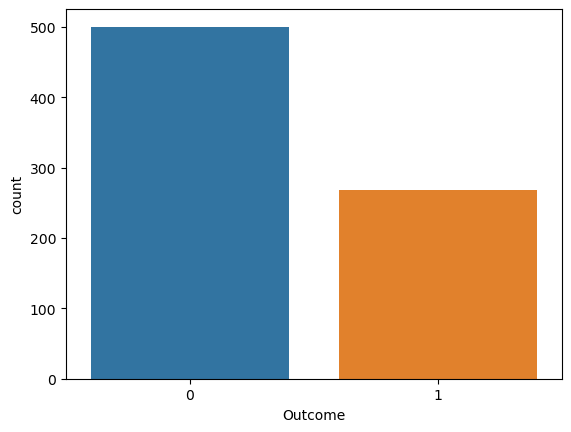

In [142]:
sns.countplot(diabetes['Outcome'],label="Count")

In [143]:
#Data Preprocessing 
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [144]:
#pulling information about the dataset
diabetes.shape

(768, 9)

In [145]:
# Generate summary statistics
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [146]:
#checking for missing values
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [147]:
df_clean = diabetes.copy()
df_clean[df_clean.columns[1:5]]==0

,Glucose,BloodPressure,SkinThickness,Insulin
0,False,False,False,True
1,False,False,False,True
2,False,False,True,True
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
763,False,False,False,False
764,False,False,False,True
765,False,False,False,False
766,False,False,True,True


In [148]:
df_2 = diabetes[~(diabetes[diabetes.columns[1:5]]==0).any(axis=1)]
df_2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


In [149]:
# Tree-based algorithms are supervised learning methods that programmers and analysts use primarily for classifications 
# and regression problems.
# Decision Trees Unlike logistic regression and support vector machines, decision trees are easy to audit, which is important for business applications. 
# In other words, you can trace the decision logic throughout each step of the model to see how the model reached the final prediction. 
# This may be critical if you need to justify a loan decision or other financial decision.

In [150]:
#Import libraries for decision tree classification
from sklearn.datasets import make_classification # Generate a random n-class classification problem
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Splits data into random subsets for train and test data
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report # Measure the quality of predictions from a classification algorithm
from sklearn.metrics import r2_score # Measuring the MSE and R-Squared values
from sklearn.metrics import mean_squared_error #The average of the square of the difference between the observed and predicted values of a variable
from sklearn import tree # non-parametric supervised learning method used for classification and regression
from sklearn.metrics import confusion_matrix #equal to the number of observations known to be in group and predicted to be in group
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

<AxesSubplot:>

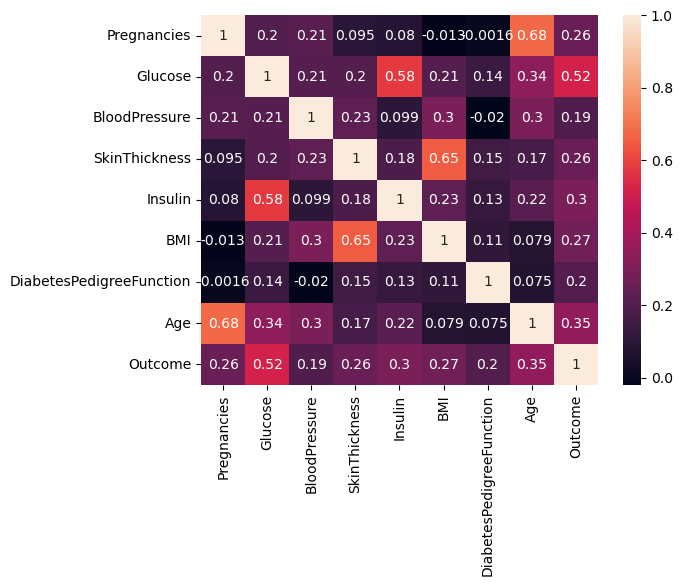

In [151]:
# An array of the same shape as data which is used to annotate the heatmap
corr=df_2.corr() 
sns.heatmap(corr, annot=True) 

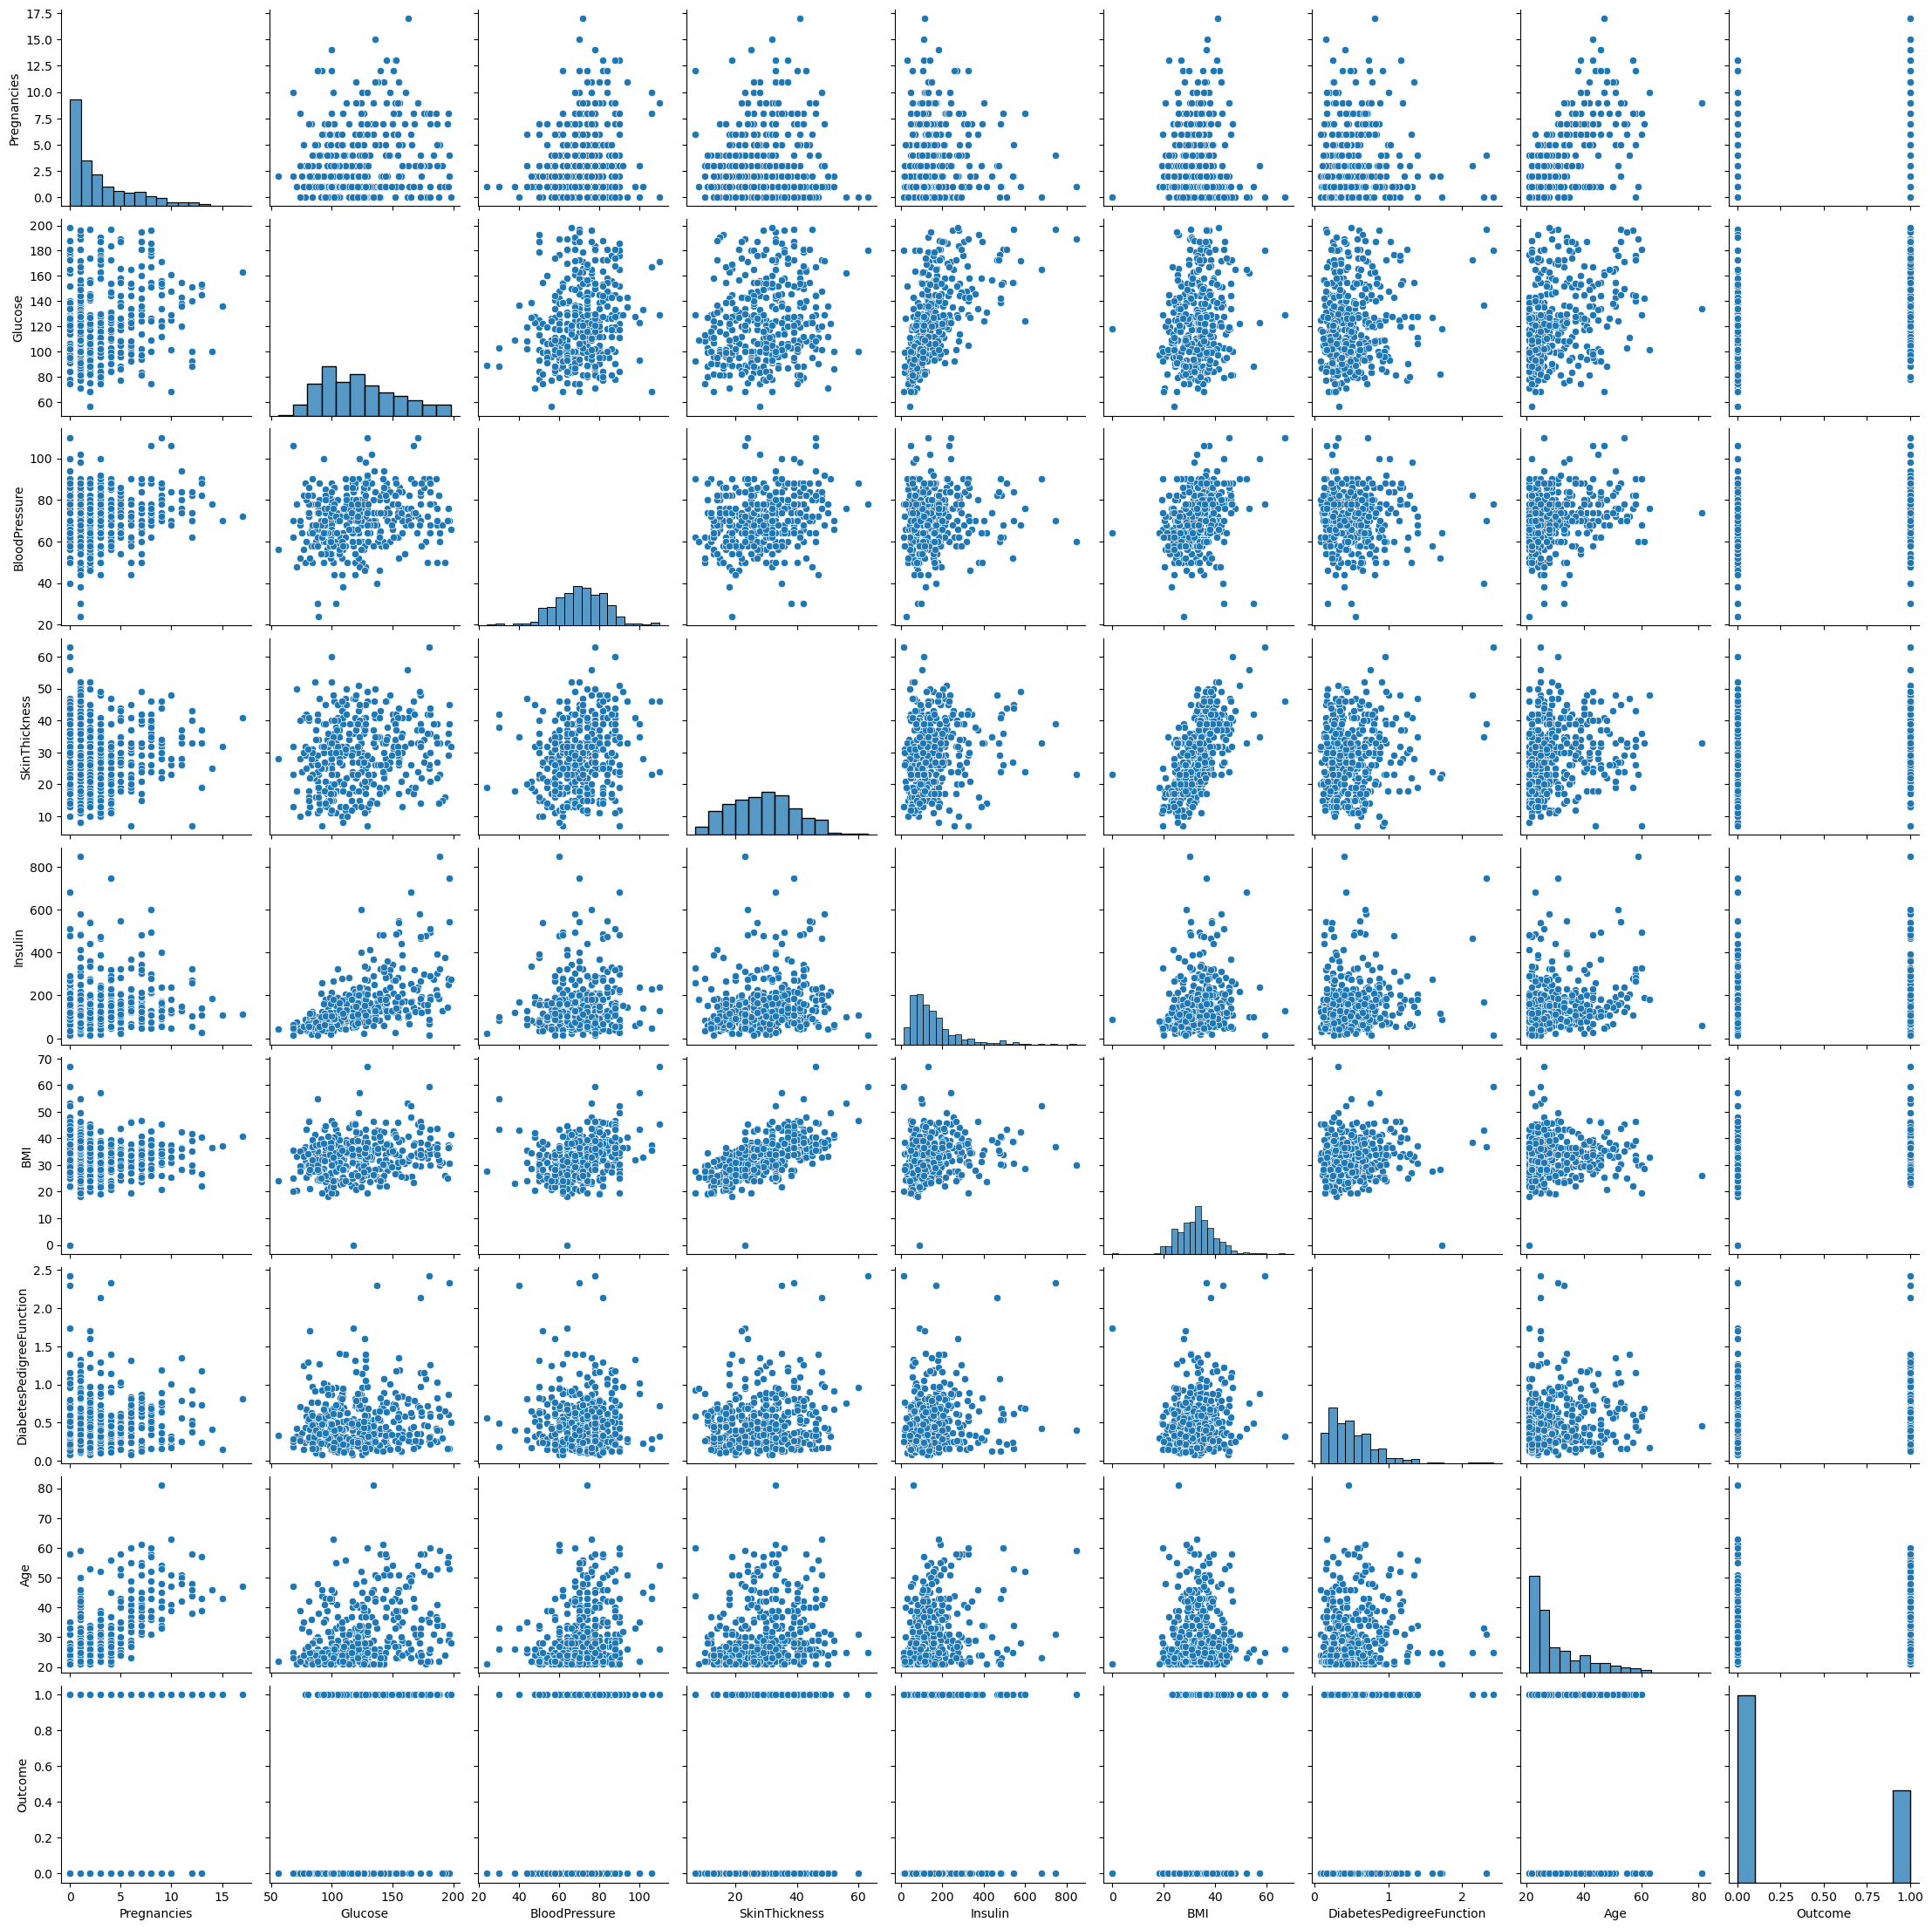

In [152]:
# Pair plot to visulize pair-wise relationships to see how columns are related
sns.pairplot(df_2)

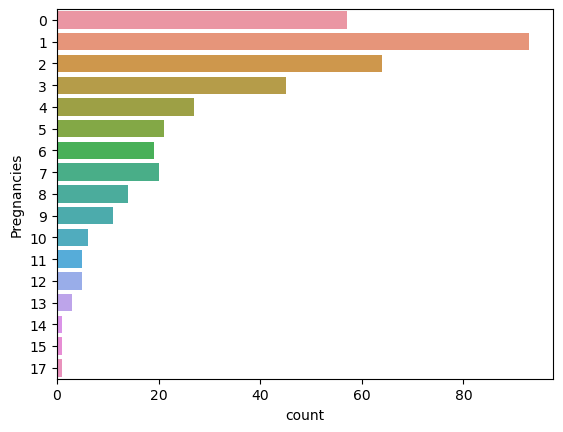

In [153]:
ax = sns.countplot(y="Pregnancies", data=df_2)

<AxesSubplot:xlabel='Age', ylabel='Glucose'>

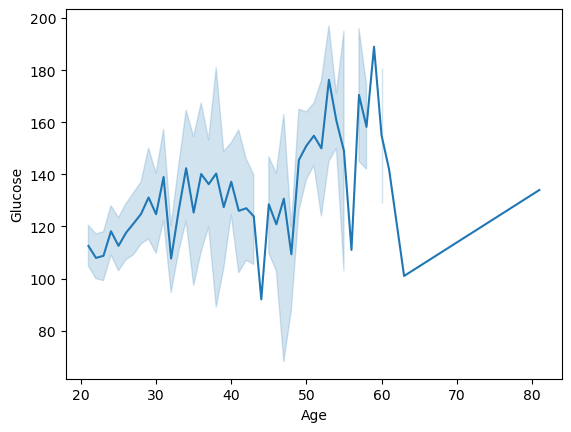

In [154]:
# Plot to see the rent trend
sns.lineplot(data=df_2, x="Age", y="Glucose") 

In [155]:
# Split dataset in features and target variable

feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
X = df_2[feature_cols] # Features
y = df_2.Outcome # Target variable

In [156]:
# Split dataset into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [157]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [158]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [159]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [160]:
# Creating the decision tree classifier instance
model = tree.DecisionTreeClassifier()

In [161]:
# Fitting the model
model = model.fit(X_train_scaled, y_train)

In [162]:
# Making predictions using the testing data
predictions = model.predict(X_test_scaled)

In [167]:
 # Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)


In [168]:
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [169]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,63,21
Actual 1,18,16


Accuracy Score : 0.6694915254237288
Classification Report
              precision    recall  f1-score   support

           0       0.78      0.75      0.76        84
           1       0.43      0.47      0.45        34

    accuracy                           0.67       118
   macro avg       0.61      0.61      0.61       118
weighted avg       0.68      0.67      0.67       118



In [64]:
#Visualizing the Decision Tree
# Create DOT data
dot_data = tree.export_graphviz(
    model, out_file=None, feature_names=X.columns, class_names=["0", "1"], filled=True
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [120]:
# Split target column from dataset
y = df_2['Outcome']
X = df_2.drop(columns='Outcome')

In [121]:
# Preview the data
X[:5]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
6,3,78,50,32,88,31.0,0.248,26
8,2,197,70,45,543,30.5,0.158,53
13,1,189,60,23,846,30.1,0.398,59


In [122]:
# Print first five entries for target
y[:5]

3     0
4     1
6     1
8     1
13    1
Name: Outcome, dtype: int64

In [123]:
# Encode the categorical variables using get_dummies
X = pd.get_dummies(X)

In [124]:
# Preview the data
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
6,3,78,50,32,88,31.0,0.248,26
8,2,197,70,45,543,30.5,0.158,53
13,1,189,60,23,846,30.1,0.398,59


In [125]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [126]:
 X_train.shape

(294, 8)

In [127]:
 X_test.shape

(99, 8)

In [128]:
# Create the StandardScaler instance
scaler = StandardScaler()
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [129]:
# Instantiate the model with k = 3 neighbors
model = KNeighborsClassifier(n_neighbors=3)

In [130]:
# Train the model
model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [131]:
# Create predictions
y_pred = model.predict(X_test_scaled)

# Review the predictions
y_pred

C:\Users\prisc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [132]:
# Print confusion matrix
confusion_matrix(y_pred,y_test)

array([[56, 13],
       [15, 15]], dtype=int64)

In [133]:
# Print classification report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80        69
           1       0.54      0.50      0.52        30

    accuracy                           0.72        99
   macro avg       0.66      0.66      0.66        99
weighted avg       0.71      0.72      0.71        99



In [134]:
print(accuracy_score(y_test,y_pred))

0.7171717171717171


C:\Users\prisc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\prisc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


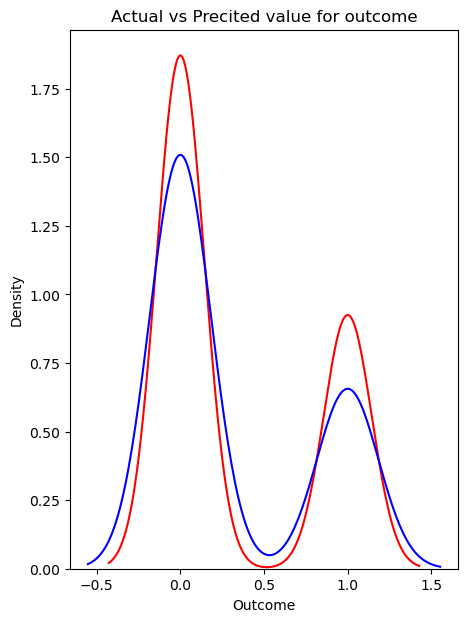

In [136]:
plt.figure(figsize=(5, 7))
ax = sns.distplot(df_2['Outcome'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Values", ax=ax)
plt.title('Actual vs Precited value for outcome')
plt.show()
plt.close()